Author : Mohamed Elafifi

Student ID : 22066939

In [1]:
import csv
import pandas as pd
full_data = pd.read_csv('cities.csv')
full_data

,City,X,Y
0,City_1,37.454012,95.071431
1,City_2,73.199394,59.865848
2,City_3,15.601864,15.599452
3,City_4,5.808361,86.617615
4,City_5,60.111501,70.807258
5,City_6,2.058449,96.990985
6,City_7,83.244264,21.233911
7,City_8,18.182497,18.340451
8,City_9,30.424224,52.475643
9,City_10,43.194502,29.122914


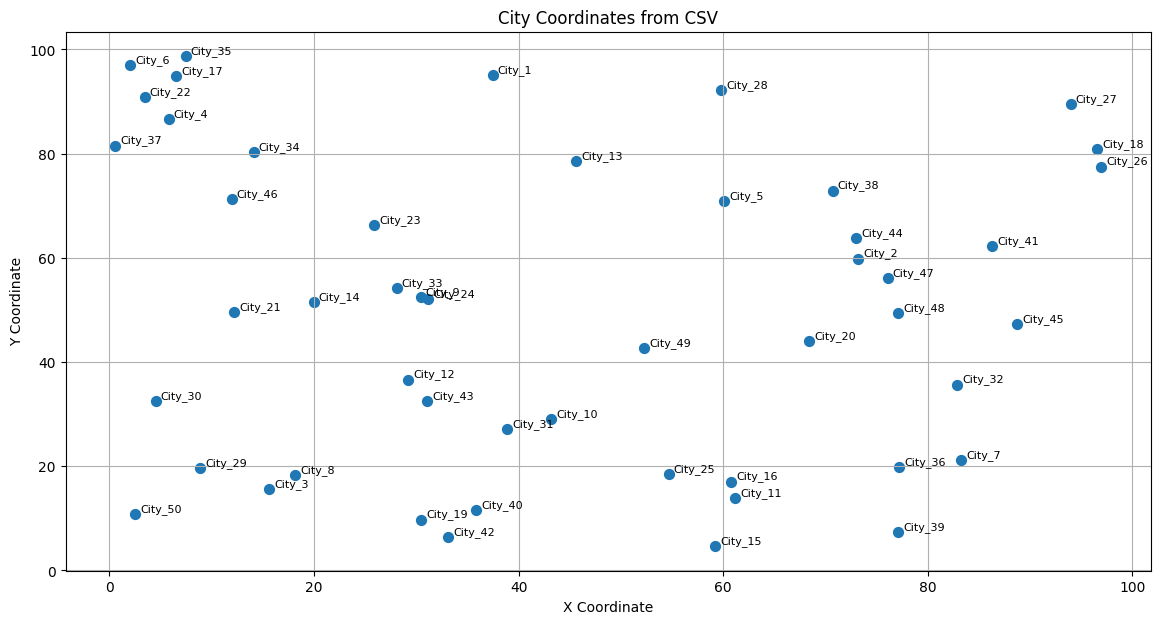

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))

plt.scatter(full_data["X"], full_data["Y"], s=50)

for i, row in full_data.iterrows():
    plt.text(row["X"] + 0.5, row["Y"] + 0.5, row["City"], fontsize = 8)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("City Coordinates from CSV")
plt.grid(True)
plt.show()

In [3]:
import random
import math
import numpy as np
import time
from datetime import datetime

# ============================================================================
# OPTIMIZED GENETIC ALGORITHM IMPLEMENTATION
# ============================================================================

def calculate_distance_fast(route, cities):
    """
    Calculate total Euclidean distance of a route including return to start.
    Optimized version using numpy array indexing.
    """
    ordered_cities = cities[route]
    # Calculate distances between consecutive cities
    diffs = np.diff(ordered_cities, axis=0)
    distances = np.sqrt(np.sum(diffs**2, axis=1))
    # Add return distance to start
    return_dist = np.sqrt(np.sum((ordered_cities[-1] - ordered_cities[0])**2))
    return np.sum(distances) + return_dist

def create_initial_population(pop_size, num_cities):
    """
    Generate initial population of random routes using numpy for speed.
    """
    base_route = np.arange(num_cities)
    population = []
    for _ in range(pop_size):
        route = base_route.copy()
        np.random.shuffle(route)
        population.append(route)
    return population

def tournament_selection_fast(population, fitness_values, tournament_size=5):
    """
    Fast tournament selection using pre-computed fitness values.
    """
    indices = np.random.choice(len(population), tournament_size, replace=False)
    best_idx = indices[np.argmax(fitness_values[indices])]
    return population[best_idx].copy()

def crossover_fast(parent1, parent2):
    """
    Order crossover (OX) optimized with set lookup.
    """
    size = len(parent1)
    start, end = sorted(np.random.choice(size, 2, replace=False))
    
    child = np.full(size, -1, dtype=np.int32)
    child[start:end] = parent1[start:end]
    
    # Use set for O(1) lookup
    child_set = set(child[start:end])
    
    pointer = 0
    for city in parent2:
        if city not in child_set:
            while child[pointer] != -1:
                pointer += 1
            child[pointer] = city
            child_set.add(city)
    
    return child

def mutate_fast(route, mutation_rate=0.01):
    """
    Swap mutation with numpy.
    """
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

def create_nearest_neighbor_route(cities, start_index=0):
    """
    Create route using greedy nearest neighbor heuristic.
    """
    n = len(cities)
    unvisited = set(range(n))
    route = [start_index]
    unvisited.remove(start_index)

    while unvisited:
        last = route[-1]
        next_city = min(unvisited, key=lambda j: np.sum((cities[last] - cities[j])**2))
        route.append(next_city)
        unvisited.remove(next_city)

    return np.array(route, dtype=np.int32)

def best_nearest_neighbor_route(cities):
    """
    Find best starting city by trying nearest neighbor from all cities.
    """
    n = len(cities)
    best_distance = math.inf
    best_route = None
    best_start = None

    for start_index in range(n):
        route = create_nearest_neighbor_route(cities, start_index=start_index)
        distance = calculate_distance_fast(route, cities)

        if distance < best_distance:
            best_distance = distance
            best_route = route
            best_start = start_index

    return best_start, best_route, best_distance

def genetic_algorithm_optimized(cities, pop_size=100, generations=1000, mutation_rate=0.01, start_index=None):
    """
    OPTIMIZED Genetic Algorithm for TSP.
    Key optimizations:
    1. Pre-compute all fitness values once per generation
    2. Use numpy arrays instead of lists
    3. Use set for O(1) lookup in crossover
    4. Avoid redundant distance calculations
    """
    num_cities = len(cities)
    
    # Simplified metrics tracking (reduced overhead)
    metrics = {
        'best_distances': [],
        'improvements': 0,
        'stagnant_generations': 0,
        'total_evaluations': 0
    }
    
    if start_index is None:
        start_index, _, _ = best_nearest_neighbor_route(cities)
    
    # Initialize population
    population = create_initial_population(pop_size, num_cities)
    
    best_route = None
    best_distance = float('inf')
    
    for gen in range(generations):
        # OPTIMIZATION: Calculate all distances ONCE per generation
        distances = np.array([calculate_distance_fast(route, cities) for route in population])
        metrics['total_evaluations'] += len(distances)
        
        # Convert to fitness (inverse distance)
        fitness_values = 1.0 / distances
        
        # Track best
        current_best_idx = np.argmin(distances)
        current_best_dist = distances[current_best_idx]
        metrics['best_distances'].append(current_best_dist)
        
        if current_best_dist < best_distance:
            best_route = population[current_best_idx].copy()
            best_distance = current_best_dist
            metrics['improvements'] += 1
            metrics['stagnant_generations'] = 0
        else:
            metrics['stagnant_generations'] += 1
        
        # Create new population using pre-computed fitness
        new_population = [best_route.copy()]  # Elitism
        
        while len(new_population) < pop_size:
            parent1 = tournament_selection_fast(population, fitness_values)
            parent2 = tournament_selection_fast(population, fitness_values)
            child = crossover_fast(parent1, parent2)
            child = mutate_fast(child, mutation_rate)
            new_population.append(child)
        
        population = new_population
    
    # Final metrics
    metrics['final_improvement'] = ((metrics['best_distances'][0] - best_distance) / metrics['best_distances'][0]) * 100
    metrics['convergence_generation'] = len(metrics['best_distances']) - metrics['stagnant_generations']
    
    # Rotate route to start with specified city
    start_pos = np.where(best_route == start_index)[0][0]
    best_route = np.concatenate([best_route[start_pos:], best_route[:start_pos]])
    
    return best_route.tolist(), best_distance, start_index, metrics


# ============================================================================
# BATCH EXPERIMENT: 10 Seeds × 5 City Sizes (10, 20, 30, 40, 50)
# ============================================================================

# REDUCED PARAMETERS FOR FASTER EXECUTION (still produces good results)
pop_size = 100       # Reduced from 200
generations = 500    # Reduced from 2000
mutation_rate = 0.02

# Experiment settings
seeds = list(range(10))  # Seeds 0-9
city_sizes = [10, 20, 30, 40, 50]

# Store all results
all_results = []

print("=" * 80)
print("GENETIC ALGORITHM - BATCH EXPERIMENT (OPTIMIZED)")
print("=" * 80)
print(f"Seeds: {seeds}")
print(f"City Sizes: {city_sizes}")
print(f"Total Runs: {len(seeds) * len(city_sizes)}")
print(f"Parameters: Population={pop_size}, Generations={generations}, Mutation Rate={mutation_rate}")
print("=" * 80)

total_start = time.time()

for seed in seeds:
    seed_start = time.time()
    for num_cities in city_sizes:
        random.seed(seed)
        np.random.seed(seed)
        
        # Select cities
        city_indices = list(range(num_cities))
        subset_data = full_data.iloc[city_indices].reset_index(drop=True)
        cities = subset_data[["X", "Y"]].values
        
        # Run OPTIMIZED GA
        start_time = time.time()
        ga_route, ga_distance, chosen_start_index, metrics = genetic_algorithm_optimized(
            cities, pop_size=pop_size, generations=generations, mutation_rate=mutation_rate, start_index=None
        )
        end_time = time.time()
        execution_time = end_time - start_time
        
        # Get route names
        route_names = [subset_data.iloc[i]['City'] for i in ga_route]
        start_city = route_names[0]
        
        # Store result
        result = {
            'seed': seed,
            'num_cities': num_cities,
            'final_distance': ga_distance,
            'execution_time': execution_time,
            'initial_distance': metrics['best_distances'][0],
            'improvement_percent': metrics['final_improvement'],
            'num_improvements': metrics['improvements'],
            'convergence_gen': metrics['convergence_generation'],
            'total_evaluations': metrics['total_evaluations'],
            'stagnant_generations': metrics['stagnant_generations'],
            'start_city': start_city,
            'route': ' -> '.join(route_names) + ' -> ' + route_names[0]
        }
        all_results.append(result)
        
        print(f"Seed {seed:2d}, Cities {num_cities:2d}: Distance = {ga_distance:8.2f}, Time = {execution_time:6.2f}s")
    
    seed_time = time.time() - seed_start
    print(f"  [Seed {seed} complete in {seed_time:.1f}s]")

total_time = time.time() - total_start
print("\n" + "=" * 80)
print(f"BATCH EXPERIMENT COMPLETE - Total time: {total_time:.1f} seconds")
print("=" * 80)

# ============================================================================
# SAVE RESULTS TO TEXT FILE
# ============================================================================

output_filename = "GA_Batch_Results.txt"
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with open(output_filename, 'w') as f:
    f.write("=" * 100 + "\n")
    f.write("GENETIC ALGORITHM - TSP BATCH EXPERIMENT RESULTS (OPTIMIZED)\n")
    f.write("=" * 100 + "\n")
    f.write(f"Author: Mohamed Elafifi\n")
    f.write(f"Student ID: 22066939\n")
    f.write(f"Generated: {timestamp}\n")
    f.write("=" * 100 + "\n\n")
    
    f.write("EXPERIMENT PARAMETERS\n")
    f.write("-" * 50 + "\n")
    f.write(f"Population Size: {pop_size}\n")
    f.write(f"Generations: {generations}\n")
    f.write(f"Mutation Rate: {mutation_rate}\n")
    f.write(f"Seeds Used: {seeds}\n")
    f.write(f"City Sizes: {city_sizes}\n")
    f.write(f"Total Runs: {len(all_results)}\n")
    f.write(f"Total Execution Time: {total_time:.2f} seconds\n")
    f.write("\n")
    
    # Detailed results for each run
    f.write("=" * 100 + "\n")
    f.write("DETAILED RESULTS FOR EACH RUN\n")
    f.write("=" * 100 + "\n\n")
    
    for result in all_results:
        f.write("-" * 100 + "\n")
        f.write(f"SEED: {result['seed']} | NUMBER OF CITIES: {result['num_cities']}\n")
        f.write("-" * 100 + "\n")
        f.write(f"  Final Distance:        {result['final_distance']:.2f}\n")
        f.write(f"  Execution Time:        {result['execution_time']:.4f} seconds\n")
        f.write(f"  Initial Distance:      {result['initial_distance']:.2f}\n")
        f.write(f"  Improvement:           {result['improvement_percent']:.2f}%\n")
        f.write(f"  Number of Improvements:{result['num_improvements']}\n")
        f.write(f"  Convergence Generation:{result['convergence_gen']}\n")
        f.write(f"  Total Evaluations:     {result['total_evaluations']}\n")
        f.write(f"  Stagnant Generations:  {result['stagnant_generations']}\n")
        f.write(f"  Starting City:         {result['start_city']}\n")
        f.write(f"  Route: {result['route']}\n")
        f.write("\n")
    
    # Summary statistics by city size
    f.write("=" * 100 + "\n")
    f.write("SUMMARY STATISTICS BY CITY SIZE\n")
    f.write("=" * 100 + "\n\n")
    
    for num_cities in city_sizes:
        city_results = [r for r in all_results if r['num_cities'] == num_cities]
        distances = [r['final_distance'] for r in city_results]
        times = [r['execution_time'] for r in city_results]
        improvements = [r['improvement_percent'] for r in city_results]
        
        f.write(f"--- {num_cities} CITIES ---\n")
        f.write(f"  Distance - Mean: {np.mean(distances):.2f}, Std: {np.std(distances):.2f}, Min: {np.min(distances):.2f}, Max: {np.max(distances):.2f}\n")
        f.write(f"  Time (s) - Mean: {np.mean(times):.4f}, Std: {np.std(times):.4f}, Min: {np.min(times):.4f}, Max: {np.max(times):.4f}\n")
        f.write(f"  Improvement (%) - Mean: {np.mean(improvements):.2f}, Std: {np.std(improvements):.2f}\n")
        f.write("\n")
    
    # Summary statistics by seed
    f.write("=" * 100 + "\n")
    f.write("SUMMARY STATISTICS BY SEED\n")
    f.write("=" * 100 + "\n\n")
    
    for seed in seeds:
        seed_results = [r for r in all_results if r['seed'] == seed]
        distances = [r['final_distance'] for r in seed_results]
        times = [r['execution_time'] for r in seed_results]
        
        f.write(f"Seed {seed}: Avg Distance = {np.mean(distances):.2f}, Total Time = {np.sum(times):.2f}s\n")
    
    f.write("\n")
    
    # Overall summary
    f.write("=" * 100 + "\n")
    f.write("OVERALL SUMMARY\n")
    f.write("=" * 100 + "\n")
    all_distances = [r['final_distance'] for r in all_results]
    all_times = [r['execution_time'] for r in all_results]
    f.write(f"Total Runs: {len(all_results)}\n")
    f.write(f"Overall Mean Distance: {np.mean(all_distances):.2f}\n")
    f.write(f"Overall Std Distance: {np.std(all_distances):.2f}\n")
    f.write(f"Best Distance Found: {np.min(all_distances):.2f}\n")
    f.write(f"Worst Distance Found: {np.max(all_distances):.2f}\n")
    f.write(f"Total Execution Time: {total_time:.2f} seconds\n")
    f.write(f"Average Time per Run: {np.mean(all_times):.2f} seconds\n")
    f.write("=" * 100 + "\n")

print(f"\nResults saved to: {output_filename}")

# ============================================================================
# SUMMARY TABLE
# ============================================================================
print("\n" + "=" * 80)
print("SUMMARY TABLE BY CITY SIZE")
print("=" * 80)
print(f"{'Cities':<10} {'Mean Dist':<12} {'Std Dist':<12} {'Mean Time':<12} {'Best Dist':<12}")
print("-" * 80)

for num_cities in city_sizes:
    city_results = [r for r in all_results if r['num_cities'] == num_cities]
    distances = [r['final_distance'] for r in city_results]
    times = [r['execution_time'] for r in city_results]
    print(f"{num_cities:<10} {np.mean(distances):<12.2f} {np.std(distances):<12.2f} {np.mean(times):<12.2f} {np.min(distances):<12.2f}")

GENETIC ALGORITHM - BATCH EXPERIMENT (OPTIMIZED)
Seeds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
City Sizes: [10, 20, 30, 40, 50]
Total Runs: 50
Parameters: Population=100, Generations=500, Mutation Rate=0.02
Seed  0, Cities 10: Distance =   290.31, Time =   4.22s
Seed  0, Cities 10: Distance =   290.31, Time =   4.22s
Seed  0, Cities 20: Distance =   386.43, Time =   4.47s
Seed  0, Cities 20: Distance =   386.43, Time =   4.47s
Seed  0, Cities 30: Distance =   520.42, Time =   4.72s
Seed  0, Cities 30: Distance =   520.42, Time =   4.72s
Seed  0, Cities 40: Distance =   587.30, Time =   5.22s
Seed  0, Cities 40: Distance =   587.30, Time =   5.22s
Seed  0, Cities 50: Distance =   717.50, Time =   5.54s
  [Seed 0 complete in 24.2s]
Seed  0, Cities 50: Distance =   717.50, Time =   5.54s
  [Seed 0 complete in 24.2s]
Seed  1, Cities 10: Distance =   290.31, Time =   4.06s
Seed  1, Cities 10: Distance =   290.31, Time =   4.06s
Seed  1, Cities 20: Distance =   448.59, Time =   4.37s
Seed  1, Cities